In [1]:
import pandas as pd
import numpy as np
import datetime
np.set_printoptions(suppress=True)

In [2]:
from yahoo_fin.stock_info import get_data
Top10CC = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'ADA-USD', 'LTC-USD',
           'EOS-USD']
hisPrices = {}
for cc in Top10CC:
    hisPrices[cc] = get_data(cc, '1/1/2019', datetime.date.today(),True, '1wk')
    
Prices = pd.DataFrame(index=np.arange(hisPrices['BTC-USD'].shape[0]),columns = Top10CC)
Prices.set_index(hisPrices['BTC-USD'].index, inplace = True)
for x in hisPrices:
    Prices[x] = hisPrices[x].adjclose
hisPrices.clear

<function dict.clear>

In [3]:
Prices

,BTC-USD,ETH-USD,USDT-USD,XRP-USD,BCH-USD,BNB-USD,LINK-USD,ADA-USD,LTC-USD,EOS-USD
2019-01-01,4025.248291,151.699219,1.013987,0.364347,161.243973,6.291411,0.376474,0.047996,37.806274,2.768176
2019-01-08,3706.052246,129.068726,1.020856,0.333766,133.979843,6.159282,0.485660,0.044059,32.358242,2.479065
2019-01-15,3576.032471,117.157852,1.013376,0.320790,122.829605,6.553025,0.503412,0.042937,31.212870,2.353150
2019-01-22,3470.450439,106.589973,1.008830,0.294863,112.496063,6.206182,0.413490,0.038772,31.199259,2.250317
2019-01-29,3459.154053,107.821602,0.999826,0.300198,119.124779,7.100500,0.394452,0.037857,34.108627,2.400352
...,...,...,...,...,...,...,...,...,...,...
2020-10-12,11742.037109,379.935608,1.000853,0.245964,250.709793,29.925068,10.886283,0.108677,48.098915,2.590166
2020-10-19,13075.248047,393.888306,1.000958,0.248688,259.782593,31.154560,11.747903,0.103097,56.745777,2.628513
2020-10-27,13550.489258,383.156738,1.000523,0.235421,257.199707,27.883930,10.797579,0.092143,53.817482,2.430644
2020-11-03,15479.567383,453.554779,1.000846,0.253939,270.697784,28.305115,12.656034,0.106621,61.055046,2.539607


In [4]:
returns = np.log(Prices/Prices.shift(1)).fillna(value=0) #log(R_t/R_t-1)

In [5]:
mean = returns.mean()
cov = returns.cov()
std = returns.std()

In [6]:
from functools import reduce
import matplotlib.pyplot as plt

In [7]:
mean.sort_values()

XRP-USD    -0.003817
EOS-USD    -0.001053
USDT-USD   -0.000136
LTC-USD     0.004587
BCH-USD     0.005016
ADA-USD     0.008021
ETH-USD     0.010955
BTC-USD     0.013635
BNB-USD     0.015180
LINK-USD    0.035767
dtype: float64

Text(0, 0.5, 'return')

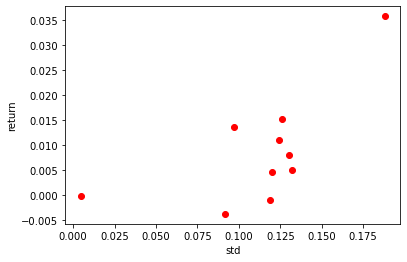

In [8]:
plt.plot(std,mean,'ro')
plt.xlabel('std')
plt.ylabel('return')

In [9]:
std_portfolio = []
return_portfolio = []

for _ in range(10000):
    w = np.random.rand(len(Top10CC))
    w /= sum(w)
    return_portfolio.append(sum(w*mean))
    std_portfolio.append(np.sqrt(reduce(np.dot,[w,cov,w.T])))

Text(0, 0.5, 'return')

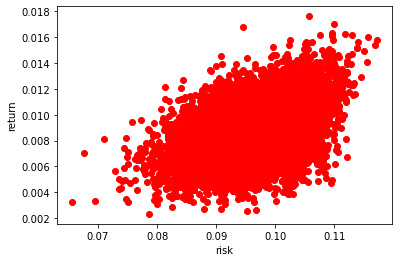

In [10]:
plt.plot(std_portfolio,return_portfolio,'ro')
plt.xlabel('risk')
plt.ylabel('return')

In [11]:
import scipy.optimize as solver

In [12]:
def std(w):
    return np.sqrt(reduce(np.dot,[w,cov,w.T]))

In [47]:
from numpy import mat

In [59]:
def getOptimalWithShortSelling(returns, expected_return,cov):
    unit_vector = mat(np.array([1.0 for x in range(len(cov))])).T
    cov_inv = mat(np.linalg.inv(cov))
    mu = mat(returns).T
    a = unit_vector.T * cov_inv * unit_vector
    b = unit_vector.T * cov_inv * mu
    c = mu.T * cov_inv * mu
    lambda1 = (c-b*expected_return)/(a*c-b*b)
    lambda2 = (a*expected_return-b)/(a*c-b*b)
    w = cov_inv*(unit_vector*lambda1 + mu*lambda2)
    return w

In [110]:
def getOptimalWithoutShortSelling(returns,expected_return,cov):
    P = []
    for i in range(0,len(cov)):
        P.append([])
        for j in cov.iloc[i]:
            P[i].append(j)
    P = matrix(P)
    q = matrix([0. for x in range(len(cov))])
    G = matrix(-1.0*np.identity(len(cov), dtype = float))
    h = matrix([0. for x in range(len(cov))])
    A = matrix([[1. for x in range(len(cov))],[matrix(returns)]]).T
    b = matrix([1.,expected_return])
    w=solvers.qp(P,q,G,h,A,b)['x']
    return w

In [ ]:
#global minimum

In [63]:
#with short-selling
cov_inv = mat(np.linalg.inv(cov))
unit_vector = mat(np.array([1.0 for x in range(len(cov))]))
w = (cov_inv*unit_vector.T)/(unit_vector*cov_inv*unit_vector.T)

In [64]:
w

matrix([[-0.01789015],
        [ 0.00256472],
        [ 1.00472675],
        [ 0.00033411],
        [ 0.01068508],
        [ 0.01113302],
        [-0.0052057 ],
        [ 0.00866089],
        [-0.00940677],
        [-0.00560195]])

In [65]:
#without short-selling
from cvxopt import matrix, solvers
P = []
for i in range(0,len(cov)):
    P.append([])
    for j in cov.iloc[i]:
        P[i].append(j)
P = matrix(P)
q = matrix([0. for x in range(len(cov))])
G = matrix(-1.0*np.identity(len(cov), dtype = float))
h = matrix([0. for x in range(len(cov))])
A = matrix([1. for x in range(len(cov))]).T
b = matrix(1.)
sol=solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0:  4.4329e-03 -1.0044e+00  1e+00  0e+00  4e+00
 1:  4.4109e-03 -1.4381e-02  2e-02  4e-17  7e-02
 2:  3.0930e-03 -3.1649e-03  6e-03  2e-16  2e-02
 3:  6.1464e-04 -1.4360e-03  2e-03  1e-15  5e-18
 4:  1.3172e-04 -1.1836e-04  3e-04  2e-16  2e-18
 5:  2.8446e-05 -8.1516e-06  4e-05  2e-16  9e-19
 6:  1.2872e-05  7.5520e-06  5e-06  1e-16  5e-19
 7:  1.0540e-05  9.8013e-06  7e-07  2e-16  2e-19
 8:  1.0195e-05  1.0088e-05  1e-07  3e-16  5e-20
 9:  1.0113e-05  1.0103e-05  1e-08  2e-16  6e-20
Optimal solution found.


In [66]:
print(sol['x'])

[ 9.79e-06]
[ 1.56e-05]
[ 9.96e-01]
[ 3.75e-05]
[ 3.73e-05]
[ 2.91e-03]
[ 4.68e-06]
[ 6.04e-04]
[ 1.29e-05]
[ 1.92e-05]



In [111]:
return_change_range = np.arange(-0.001,0.005,0.0001)
risk = []
max_sharpe = 0.0
w0 = np.array([1/len(Top10CC) for x in range(len(Top10CC))])
bounds = tuple((0,1) for x in range(len(Top10CC)))
for i in return_change_range:
    #print(getOptimalWithShortSelling(returns.mean(), i ,cov))
    print(getOptimalWithoutShortSelling(returns.mean(), i ,cov))
    constraints = [{'type':'eq','fun': lambda x: sum(x) - 1}, {'type':'eq', 'fun': lambda x: sum(x*mean) - i}]
    outcome = solver.minimize(std, x0=w0, constraints = constraints,bounds = bounds)
    if (i-0.0004)/outcome.fun > max_sharpe:
        max_sharpe = (i-0.0004)/outcome.fun
    risk.append(outcome.fun)
    print(outcome.x)

     pcost       dcost       gap    pres   dres
 0:  3.8249e-03 -1.0208e+00  1e+01  4e+00  4e+00
 1:  3.6142e-03 -7.5990e-01  2e+00  3e-01  3e-01
 2:  3.1197e-03 -2.0136e-01  4e-01  5e-02  6e-02
 3:  3.4428e-03 -4.7271e-02  5e-02  1e-15  4e-16
 4:  3.2422e-03 -2.1247e-03  5e-03  4e-16  7e-17
 5:  6.8591e-04 -2.1747e-03  3e-03  2e-16  2e-17
 6:  3.9082e-04  1.8457e-04  2e-04  1e-16  1e-17
 7:  2.5022e-04  2.3894e-04  1e-05  2e-16  1e-17
 8:  2.4002e-04  2.3990e-04  1e-07  2e-16  9e-18
 9:  2.3991e-04  2.3991e-04  1e-09  2e-16  5e-18
Optimal solution found.
[ 1.42e-08]
[ 1.57e-08]
[ 7.65e-01]
[ 2.35e-01]
[ 2.93e-08]
[ 1.28e-08]
[ 5.66e-09]
[ 2.09e-08]
[ 3.03e-08]
[ 1.41e-07]

[0.         0.         0.76535498 0.23464502 0.         0.
 0.         0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  3.8239e-03 -1.0214e+00  1e+01  4e+00  4e+00
 1:  3.6195e-03 -7.6232e-01  2e+00  3e-01  3e-01
 2:  3.1311e-03 -2.0451e-01  4e-01  5e-02  6e-02
 3:  3.4299e-03 -

 9:  1.1657e-05  1.0660e-05  1e-06  1e-16  2e-19
10:  1.1132e-05  1.1013e-05  1e-07  2e-16  1e-19
11:  1.1059e-05  1.1055e-05  4e-09  2e-16  9e-20
Optimal solution found.
[ 2.67e-05]
[ 5.99e-06]
[ 9.88e-01]
[ 1.11e-06]
[ 6.76e-06]
[ 9.57e-03]
[ 2.48e-03]
[ 3.47e-05]
[ 2.18e-06]
[ 1.38e-06]

[0.         0.         0.98794443 0.         0.         0.00954984
 0.00250573 0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  3.8228e-03 -1.0266e+00  1e+01  3e+00  4e+00
 1:  3.6821e-03 -7.8594e-01  2e+00  3e-01  3e-01
 2:  3.2722e-03 -2.1865e-01  3e-01  3e-02  4e-02
 3:  3.3510e-03 -1.7246e-02  2e-02  2e-16  8e-16
 4:  2.4711e-03 -3.0597e-03  6e-03  4e-16  2e-16
 5:  4.2903e-04 -1.3107e-03  2e-03  1e-16  1e-17
 6:  7.8727e-05 -1.2156e-04  2e-04  6e-16  7e-18
 7:  2.1095e-05 -1.6826e-06  2e-05  7e-16  2e-18
 8:  1.4786e-05  1.0120e-05  5e-06  3e-16  3e-19
 9:  1.2655e-05  1.1794e-05  9e-07  2e-16  2e-19
10:  1.2098e-05  1.2009e-05  9e-08  1e-16  2e-19
Optimal 

 4:  3.2308e-04 -4.9431e-03  5e-03  3e-16  3e-17
 5:  1.5823e-04 -4.2228e-04  6e-04  3e-16  8e-18
 6:  7.2434e-05 -1.3704e-05  9e-05  4e-16  3e-18
 7:  4.0222e-05  2.4645e-05  2e-05  1e-16  6e-19
 8:  3.3529e-05  3.1908e-05  2e-06  1e-16  6e-19
 9:  3.2257e-05  3.2233e-05  2e-08  1e-16  3e-19
Optimal solution found.
[ 1.41e-02]
[ 1.29e-05]
[ 9.51e-01]
[ 3.34e-06]
[ 9.60e-06]
[ 1.02e-02]
[ 2.47e-02]
[ 1.83e-05]
[ 7.51e-06]
[ 4.12e-06]

[0.01307566 0.         0.95123097 0.         0.         0.01094655
 0.02474683 0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  3.8378e-03 -1.0295e+00  1e+01  3e+00  4e+00
 1:  3.7469e-03 -8.0271e-01  1e+00  2e-01  2e-01
 2:  3.4230e-03 -1.9671e-01  2e-01  2e-02  2e-02
 3:  3.3600e-03 -7.4474e-03  1e-02  5e-04  6e-04
 4:  3.0597e-04 -5.1088e-03  5e-03  1e-16  1e-17
 5:  1.6878e-04 -2.9590e-04  5e-04  4e-16  9e-18
 6:  6.9166e-05 -7.7008e-05  1e-04  6e-18  1e-17
 7:  4.3367e-05  3.2444e-05  1e-05  3e-18  2e-18
 8:  3.6

10:  7.8230e-05  7.8212e-05  2e-08  1e-16  5e-19
Optimal solution found.
[ 3.26e-02]
[ 1.78e-06]
[ 9.12e-01]
[ 5.09e-07]
[ 4.22e-07]
[ 8.94e-03]
[ 4.60e-02]
[ 1.42e-06]
[ 6.28e-07]
[ 5.38e-07]

[0.03384948 0.         0.91211105 0.         0.         0.00826435
 0.04577511 0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  3.8682e-03 -1.0308e+00  1e+01  3e+00  4e+00
 1:  3.8195e-03 -8.1501e-01  1e+00  1e-01  2e-01
 2:  3.5908e-03 -1.4285e-01  2e-01  1e-02  1e-02
 3:  3.3986e-03 -8.6448e-03  1e-02  8e-04  9e-04
 4:  7.8465e-04 -6.5923e-03  7e-03  3e-04  3e-04
 5:  4.9179e-04 -6.4856e-04  1e-03  3e-05  3e-05
 6:  1.8106e-04 -3.6124e-04  5e-04  3e-16  3e-18
 7:  1.0867e-04  6.6773e-05  4e-05  1e-16  2e-18
 8:  9.1224e-05  6.3497e-05  3e-05  4e-18  7e-19
 9:  8.4694e-05  8.2374e-05  2e-06  3e-16  7e-19
10:  8.4194e-05  8.4152e-05  4e-08  3e-16  6e-19
Optimal solution found.
[ 3.45e-02]
[ 3.76e-06]
[ 9.09e-01]
[ 8.63e-07]
[ 1.06e-06]
[ 8.84e-03]
[ 4.81e-02

 1:  3.9088e-03 -8.2344e-01  1e+00  8e-02  9e-02
 2:  3.7802e-03 -6.7568e-02  7e-02  3e-03  3e-03
 3:  3.3053e-03 -8.4731e-03  1e-02  4e-04  5e-04
 4:  1.0738e-03 -4.7533e-03  6e-03  1e-04  1e-04
 5:  6.6033e-04 -5.9189e-04  1e-03  2e-05  2e-05
 6:  2.9166e-04 -3.1200e-04  6e-04  2e-16  4e-18
 7:  1.9997e-04  1.3771e-04  6e-05  2e-16  2e-18
 8:  1.7216e-04  1.5439e-04  2e-05  2e-16  1e-18
 9:  1.6626e-04  1.6578e-04  5e-07  1e-16  1e-18
10:  1.6608e-04  1.6608e-04  7e-09  3e-16  7e-19
Optimal solution found.
[ 5.46e-02]
[ 6.19e-07]
[ 8.66e-01]
[ 2.15e-07]
[ 3.14e-07]
[ 7.46e-03]
[ 7.16e-02]
[ 5.99e-07]
[ 3.56e-07]
[ 2.24e-07]

[0.05534324 0.         0.86698721 0.         0.         0.00556414
 0.07210541 0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  3.9249e-03 -1.0299e+00  1e+01  3e+00  4e+00
 1:  3.9174e-03 -8.2394e-01  1e+00  7e-02  8e-02
 2:  3.7978e-03 -6.0308e-02  6e-02  2e-03  2e-03
 3:  3.2692e-03 -8.2518e-03  1e-02  4e-04  4e-04
 4:  1.0

 2:  2.8472e-03 -2.0600e-03  5e-03  8e-17  1e-02
 3:  1.2482e-03 -2.6757e-03  4e-03  3e-16  6e-03
 4:  5.0040e-04  1.8463e-04  3e-04  4e-16  1e-04
 5:  3.3388e-04  2.2240e-04  1e-04  2e-16  2e-18
 6:  2.9323e-04  2.8684e-04  6e-06  2e-16  1e-18
 7:  2.8971e-04  2.8936e-04  3e-07  2e-16  2e-18
 8:  2.8958e-04  2.8956e-04  2e-08  2e-16  2e-18
Optimal solution found.
[ 7.65e-02]
[ 2.34e-07]
[ 8.20e-01]
[ 8.62e-08]
[ 1.43e-07]
[ 6.24e-03]
[ 9.71e-02]
[ 2.34e-07]
[ 1.54e-07]
[ 8.93e-08]

[0.07674566 0.         0.82019847 0.         0.         0.00586558
 0.0971903  0.         0.         0.        ]
     pcost       dcost       gap    pres   dres
 0:  4.0036e-03 -1.0266e+00  1e+00  2e-16  4e+00
 1:  3.9834e-03 -1.3445e-02  2e-02  8e-17  6e-02
 2:  2.8522e-03 -2.0778e-03  5e-03  7e-17  1e-02
 3:  8.2101e-04 -2.3289e-03  3e-03  2e-16  5e-04
 4:  4.3542e-04  1.8367e-04  3e-04  1e-16  3e-05
 5:  4.3021e-04 -1.5641e-05  4e-04  1e-16  1e-05
 6:  3.2479e-04  2.4312e-04  8e-05  3e-16  3e-18
 7:  3.0

Text(0, 0.5, 'portfolio return')

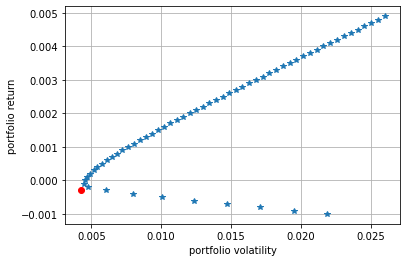

In [14]:
constraints = [{'type':'eq','fun': lambda x: sum(x) - 1}]
outcome = solver.minimize(std, x0=w0, constraints = constraints )
plt.plot(outcome.fun, sum(outcome.x*mean), 'ro')
plt.plot(risk, return_change_range,'*')
plt.grid(True)
plt.xlabel('portfolio volatility')
plt.ylabel('portfolio return')

In [15]:
outcome

     fun: 0.004222021643322832
     jac: array([0.00388481, 0.00411018, 0.0042106 , 0.00451733, 0.00412868,
       0.00452677, 0.00396311, 0.00410249, 0.00429363, 0.00370456])
 message: 'Optimization terminated successfully'
    nfev: 169
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([-0.01770106,  0.00254879,  1.00477838, -0.00015599,  0.01089385,
        0.01097293, -0.00505661,  0.00884811, -0.00952864, -0.00559976])

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(mean,cov)
weights = ef.max_sharpe(risk_free_rate= 0.0002613771781789633)
ef.portfolio_performance(verbose= True,risk_free_rate = 0.0002613771781789633)

In [ ]:
weights

In [ ]:
type(weights)